# Lecture 1

# A simple life-cycle model in general equilibrium

In [2]:
# Toolkit on coding multiperiod OLG models
# Iowa State Univeristy, Fall semester 2021
# Authors: Frederik Bjørn Christensen, Tim Dominik Maurer

# 1. Model features

* Time is discrete and indexed by $t \in \{0,1,2,..\}$.
* There is no growth in technology level or population size.

## 1.1.Households
* Agents live for $T$ periods and retire in period $R$.
* Household age is discrete and indexed by $j \in \{1,2,..,T\}$.
* They own capital and supply labor exogenously.

### The Problem
Agents born at time $t$, who start to consume in period $t+1$, maximize the present value of life-time utility w.r.t. consumption $c$ subject to a period-by-period budget constraint. The problem reads:

\begin{align}
\max_{\left\{ c_{t}^{i},a_{t}^{i}\right\} }\text{ }U & =\sum_{j=1}^{T}\beta^{t}u(c_{j,t})\\
& s.t.\\
c_{j,t}+a_{j,t} & =w_{t+j}l_{j,t}+\left(1+r_{t+j}\right)a_{j-1,t} \quad \quad \text{with }  a_{0,t}=0\\
\end{align}

Here, $a$ are savings, $w$ is the wage rate, $r$ is the interest rate on capital and $l$ is exogenous labor supply with:
\begin{equation}
l_j = \begin{cases}
1 \quad \text{if } j\leq R\\
0 \quad \text{otherwise}
\end{cases}
\end{equation}

We choose CRRA-utility such that:
\begin{equation}
u(c) = \begin{cases}
\dfrac{c^{1-\rho}-1}{1-\rho} & \rho\geq0,\rho\neq1 \\\
\log(c) & \rho=1
\end{cases}
\end{equation}


### FOC
Derive the period-by-period Euler-Equation:

\begin{align}
c_{j+1,t} & = c_{j,t}\left[\beta\left(1+r_{t+j+1}\right)\right]^{\frac{1}{\rho}}
\tag{L1.1}
\end{align}

Derive the long-term Euler-Equation:

\begin{align}
c_{j,t}=c_{1,t}\left[\beta^{j-1}\prod_{x=2}^{j}\left(1+r_{t+x}\right)\right]^{\frac{1}{\rho}} \quad \text{for } j>1
\tag{L1.2}
\end{align}

### Consolidated budget constraint
Derive the consolidated budget constraint at birth:
\begin{align}
\sum_{j=1}^{T}\dfrac{c_{j,t}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}=\sum_{j=1}^{T}\dfrac{w_{t+j}l_{j,t}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}
\end{align}

### Solve for $c_1$
Solve for $c_{1,t}$ by eliminating $c_{j,t}$ using the long-term Euler-Equation:
\begin{align}
c_{1,t}=\dfrac{\sum_{j=1}^{T}\dfrac{w_{t+j}l_{j,t}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}}{\sum_{j=1}^{T}\dfrac{\left[\dfrac{\beta^{j-1}}{\left(1+r_{t+1}\right)}\prod_{x=1}^{j}\left(1+r_{t+x}\right)\right]^{\frac{1}{\rho}}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}}
\tag{L1.3}
\end{align}

## 1.2. Firms
* There is a single consumption good, which is produced using a neoclassical aggregate production function $Y_t=F\left(K_t,L_{t}\right)$ from $K_t$ units of capital and $L_{t}$ labor units supplied at time $t$. 
* We assume that $F$ is CRS and Cobb-Douglas, $Y_{t} =K_{t}^{\alpha}L_{t}^{1-\alpha}$.

* Firms maximise their profits:
\begin{align}
\max_{\left\{ K_{t},L_{t}\right\} }\text{ } \Pi_{t} & =Y_{t}-\left(r_{t}+\delta\right)K_{t}-w_{t}L_{t},
\end{align}
where $\delta$ is the depreciation rate of captial and $r_{t} + \delta$ is the capital rental rate.

## 2. Equilibrium
* Households maximize utility
* Firms maximize profits
* The the capital market, the labor market as well as the goods market clear in equilibrium:
\begin{align}
    K_{t+1} & =\sum_{j=1}^{T}a_{j,t-j}\\
    L_t & =\sum_{j=1}^{T}l_{j,t-j} \\
    Y_{t} & = C_t + I_t = C_t + K_{t+1} - (1-\delta) K_t
\end{align}
* Equilibrium factor prices equal
\begin{align}
    r_{t} & =\alpha\left(\dfrac{K_{t}}{L_{t}}\right)^{\alpha-1}-\delta\\
    w_{t} & =\left(1-\alpha\right)\left(\dfrac{K_{t}}{L_{t}}\right)^{\alpha}
\end{align}
Note that  $C_t=\sum_{j=1}^{T}c_{j,t-j}$.


## 3. Solving the steady state
In a steady state equilibrium we have that capital and thus factor prices are constant. For optimal first period consumption this implies:

\begin{equation*}
c_1=\dfrac{w\sum_{j=1}^{T}\dfrac{l_{j}}{\left(1+r\right)^{j}}}{\sum_{j=1}^{T}\dfrac{\left[\beta\left(1+r\right)\right]^{\frac{j-1}{\rho}}}{\left(1+r\right)^{j}}}
\label{eq:c_1ss} \tag{L1.4}
\end{equation*}


### 3.1 Alogrithm to find steady-state capital level

To solve for steady-state capital we use a solution algorithm proceeding as follows:
1. Guess a steady-state capital stock $K^{\prime}$
2. Calculate factor prices $w^{\prime}$ and $r^{\prime}$ given $K^{\prime}$ 
3. Solve for $c_1$ in euqation $(L1.4)$ given  $w^{\prime}$ and $r^{\prime}$
4. Solve $c_j \forall j>1$ using the Euler equation $c_{j+1}=\left[\beta\left(1+r^{\prime}\right)\right]^{-\frac{1}{\rho}} c_{j}$
5. Solve $a_j \forall j>1$ using the budget constraint $a_{j} =w^{\prime}l_{j}+\left(1+r^{\prime}\right) a_{j-1}-c_{j}$
6. Compute implied aggregate capital $K^{\prime\prime} =\sum_{j=1}^{T}a_{j}$
8. Check whether aggregate capital equals the guess $K^{\prime}$
9. Update guess of capital until convergence, $K^{\prime}\approx K^{\prime\prime}$


# 4. Implementation

In [2]:
# Import packages
import numpy as np
import scipy.optimize as optimize
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
from IPython import display

### 4.1 Calibration

In [3]:
# Define a dictionary for model parameters
par = dict() 
# Calibrate parameters
par['T'] = 20 # max age
par['R'] = 15 # retirement age
par['α'] = 1/3 # output elasticities of capital
par['ρ'] = 2 # risk aversion parameter
par['δ'] = 0.07 # yearly depreciation rate
par['β'] = 0.95 # agent's patience parameter
# vector exogenous labor supply given retirement
par['l'] = np.concatenate([np.ones(par['R']),np.zeros([par['T'] - par['R']])]) 
par['L'] = sum(par['l']) # aggregate labor supply

# unpack
T = par['T']
R = par['R']
α = par['α']
ρ = par['ρ']
δ = par['δ']
β = par['β']
l = par['l']
L = par['L']

### 4.2. Solve the model for given captial level
Ultimately, we are going to write a function that takes care of step 1 to 6 of the algorithm. But let us first go through the steps one-by-one:

In [4]:
# STEP 1: Guess a steady-state capital level
K = 35

# STEP 2: Calculate factor prices given the guessed captial level
r = α*(K/L)**(α-1) - δ
w = (1 - α)*(K/L)**α

# print factor prices
print('interest rate:',r) 
print('         wage:',w) 

interest rate: 0.11947891466173288
         wage: 0.8842349350880873


In STEP 3, we want to calcualte first-period consumption. Let us first restate the expression for steady-state, first-period consumption in (L1.4)
\begin{equation*}
c_1=\dfrac{w\sum_{j=1}^{T}\dfrac{l_{j}}{\left(1+r\right)^{j}}}{\sum_{j=1}^{T}\dfrac{\left[\beta\left(1+r\right)\right]^{\frac{j-1}{\rho}}}{\left(1+r\right)^{j}}}
\end{equation*}

and then focus on the numerator:

\begin{equation*}
w\sum_{j=1}^{T}\dfrac{l_{j}}{\left(1+r\right)^{j}} \tag{L1.5}
\end{equation*}

A neat way of coding this is to vectorize and then take the sum over a vector. Our vector of exogenous labor supply looks like this:
$ \textbf{l} = \left[l_1 = 1 , l_2 = 1,...,l_R = 1, l_{R+1} = 0 , ..., l_{T}= 0\right]$


In [5]:
l # print the vector 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0.])

We now want to divide the vector $l$ by the following cumulative product vector of $(1+r)$: 

$\left[(1+r)^1 , (1+r)^2,...,(1+r)^{T-1},(1+r)^{T}\right]$


In [6]:
np.linspace(1,T,T) # first define a vector of a sequence from 1 to T used for the power

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [7]:
(1+r)**np.linspace(1,T,T) # put (1+r) to the power 

array([1.11947891, 1.25323304, 1.40296796, 1.57059305, 1.75824581,
       1.96831911, 2.20349174, 2.46676254, 2.76148865, 3.09142832,
       3.46078882, 3.87428011, 4.33717489, 4.85537584, 5.43549088,
       6.08491743, 6.81193676, 7.62581957, 8.53694421, 9.55692904])

We are now ready to evaluate (L1.5) as:

In [8]:
 w*sum(l/(1+r)**np.linspace(1,T,T))

6.039198711171896

Given that we have introduced the concept of evaluating sums using vectorization, we can compute optimal steady-state, first-period consumption:

In [9]:
# STEP 3: Solve for first periond consumption as in equation (L1.4)
C1 = w*sum(l/(1+r)**np.linspace(1,T,T))/sum((β*(1+r))**((np.linspace(1,T,T)-1)/ρ)/(1+r)**np.linspace(1,T,T))
print('C1:',C1) 

# STEP 4: Solve for the consumption path over the life-cycle

# using very similar techniques and the Long-run Euler Equation (L1.2),
# we can solve for the vector of the consumption path:
C = C1*(β*(1+r))**((np.arange(T))/ρ)
print('Long run Euler vector that is multiplied with C1:')
print((β*(1+r))**((np.arange(T))/ρ))
print('Vector of consumption path:')
print(C)

C1: 0.6607134171230338
Long run Euler vector that is multiplied with C1:
[1.         1.03126377 1.06350497 1.09675415 1.13104282 1.16640348
 1.20286966 1.2404759  1.27925786 1.31925229 1.36049709 1.40303136
 1.44689541 1.49213082 1.53878046 1.58688855 1.63650067 1.68766385
 1.74042659 1.79483889]
Vector of consumption path:
[0.66071342 0.68136981 0.702672   0.72464018 0.74729517 0.77065843
 0.79475212 0.81959907 0.84522283 0.87164769 0.89889868 0.92700164
 0.95598321 0.98587086 1.0166929  1.04847855 1.08125795 1.11506215
 1.1499232  1.18587414]


This vectorization is much faster and neater than writing a loop that would use the short-term Euler Equation (L1.1):

In [10]:
# define storage for consumption path
Cloop = np.zeros(T)
Cloop[0] = C1 # first period consumption is the first index (indexatin in python starts at 0)
for i in range(T-1): # loop consumption forward using the short-term Euler equation in (L1.1)
    Cloop[i+1] = (β*(1+r))**(1/ρ) * Cloop[i]
# check that both techniques give the same result: (we check whether the absolute difference is very very small)
abs(Cloop-C)<10e-12

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [11]:
# STEP 5: Solve for the whole savings path using the budget constraint
A = np.zeros(T) # preallocate storage
A[0] = w*l[0] - C[0] # solve for first period savings given no initial wealth
for t in range(1,T): # solve the whole savings path
    A[t] = w*l[t] + (1 + r)*A[t-1] - C[t]
    
# STEP 6: Compute implied aggregate capital
K_implied = sum(A)
print('Implied level of capital:' ,K_implied)
print('Initial guess:' ,K)

Implied level of capital: 39.50563150763501
Initial guess: 35


### 4.4 Function solving the model for given factor prices

In [12]:
# Solve fore the consumption and savings plan given an interest rate
def solve(K_guess,par): # Solve for consumption, savings and aggregate capital given a guess for r

    # Unpacking Parameters
    T = par['T']
    ρ = par['ρ']
    δ = par['δ']
    β = par['β']
    l = par['l']
    L = par['L']

    # STEP 2: Solve for wage given guessed interest rate
    r = α*(K_guess/L)**(α-1) - δ
    w = (1 - α)*(K_guess/L)**α

    # STEP 3: Solve for first periond consumption as in equation (L1.4)
    C1 = w*sum(l/(1+r)**np.linspace(1,T,T))/sum((β*(1+r))**((np.linspace(1,T,T)-1)/ρ)/(1+r)**np.linspace(1,T,T))
    
    # STEP 4: Solve for the whole consumption path using the Long-Run Euler equation (L1.2)
    C = C1*(β*(1+r))**((np.arange(T))/ρ)

    # STEP 5: Solve for the whole saviongs path using the budget constraint
    A = np.zeros(T) # preallocate storage
    A[0] = w*l[0] - C[0] # solve for first period savings given no initial wealth
    for t in range(T): # solve the whole savings path
        if t>0:
            A[t] = w*l[t] + (1 + r)*A[t-1] - C[t]

    # STEP 6: Compute implied aggregate capital by summing over savings path
    K_implied = sum(A)
     
    return C,A,K_implied

### 4.5 Function define loss given guess

In [13]:
# Define objective function that outputs the distances between K_guess and K_implied (STEP 8)
def objective(K_guess,par): # Solves the SS
   
    C,A,K_implied = solve(K_guess,par) 
    
    # STEP 8: Check distance between K_guess - K_implied (Note we define the loss as the squared difference)
    loss = (K_guess - K_implied)**2  
    return loss


### 4.6 Minimize loss function to find equlibrium
In order to discipline the upper bound of the guess of capital, we can solve the expression for the interest rate for capital:
\begin{align}
    r_{t} & =\alpha\left(\dfrac{K_{t}}{L_{t}}\right)^{\alpha-1}-\delta\\
    K_t & = L_t \left( \frac{r_{t}+\delta}{\alpha}\right)^{\frac{1}{\alpha-1}}
\end{align}
If $r_{t}+\delta<0$ capital become imaginary.

In [14]:
# Define a model-consistent level of the lower bound
r_lb = 0.01 - δ # lower bound r
K_ub = L*((r_lb+δ)/α)**(1/(α-1)) # upper bound K(r_lb)
print('    Upper bound of K:',K_ub)

# STEP 9: Minimize loss

# using an initial guess
Kguess = 100
sol = optimize.minimize(objective,Kguess,args=(par))

# using bounds (constrained optimization)
# sol2 = optimize.minimize_scalar(objective,bounds=[0,K_ub],args=(par),method='bounded')

# Equilibrium capital stock
K_ss = sol.x
print('Steady-state capital:',K_ss[0])

    Upper bound of K: 2886.751345948126
Steady-state capital: 38.736617912697334


### 4.7 Steady-state consumption and savings paths

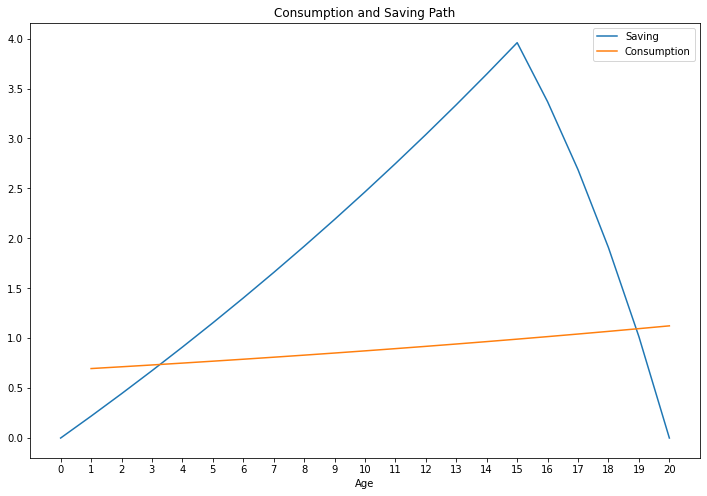

In [15]:
C_ss,A_ss,K_ss = solve(K_ss,par)

# add zero wealth at birth
A_ss = np.concatenate([np.zeros(1),A_ss]) 

plt.plot(np.arange(T+1),A_ss)
plt.plot(np.linspace(1,T,T),C_ss)
plt.title('Consumption and Saving Path')
plt.xlabel("Age")
plt.gca().legend(('Saving','Consumption'))
plt.xticks(np.arange(T+1))
plt.show()

Question: Could you come up with a faster solution algorithm that differs from our algorithm after step 4 and does not require to calculate the path of savings and implied capital?


## 5. Contraction mapping

Let $(K,d)$ be a [metric space](https://en.wikipedia.org/wiki/Metric_space). A mapping $M: K \rightarrow K$ is a contraction mapping if there exists a constant $c$, with $0\leq c < 1$, such that: 

$$
| M(k^{\prime})-M(k^{\prime\prime})| \leq c | k^{\prime}-k^{\prime\prime} |
$$ 

for all $k^{\prime},k^{\prime\prime} \in K$. In this application, the mapping function $M(K)$ maps a guess of steady-state capital onto an implied capital level given optimal behavior:
$$
M(K)=\sum_{j=1}^{T}a_{j,t-j}\left(w(K^{}), r(K_{}^{}) \right)
$$

Here, we do not formally prove whether a contraction mapping exists but numerically investigate whether $M(K)$ contracts $K$ to the previously computed steady state. First, we plot the mapping function $M(K)$ using discretization:

1. Choose a grid of guesses of steady-state capital levels $\mathcal{G} \equiv\left\{K^{0}, K^{1}, \ldots, K^{\#}\right\}$
2. For each guess $K^{i} \in \mathcal{G}$ solve for the implied capital level $K_{+}^{i}$.

$$
K_{+}^{i}  =\sum_{j=1}^{T}a_{j,t-j}\left(w(K^{i}), r(K_{}^{i}) \right)
$$

3. The discritized mapping function then yields: $\left\{\left(K^{0}, K_{+}^{0}\right),\left(K^{1}, K_{+}^{1}\right), \ldots,\left(K^{\#}, K_{+}^{\#}\right)\right\}$

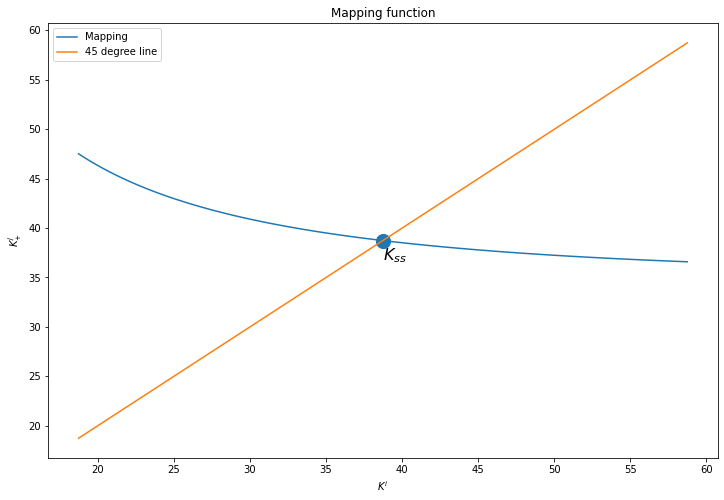

In [16]:
# define the grid of K^i
gridsize  = 100 
ss_jump = 20  # how far away form steady state do we jump

K = np.linspace(K_ss-ss_jump,K_ss+ss_jump,gridsize) # Define grid


# Compute associated K_{+}
K_plus = np.copy(K) # preallocate storage


for i in range(gridsize):
    C_temp,A_temp,K_temp = solve(K[i],par) 
    K_plus[i] = K_temp
    
## plot the maping function
plt.plot(K,K_plus) # mapping function
plt.plot(K,K) # 45 degree line
plt.scatter(K_ss,K_ss,s=200) # Point of steady state
plt.text(K_ss,K_ss-ss_jump/10, '$K_{ss}$', fontsize=16) # label of steady state point
plt.title('Mapping function') 
plt.xlabel('$K^i$')
plt.ylabel('$K^j_{+}$')
plt.gca().legend(('Mapping','45 degree line'))

Second, we plot the contraction mapping using an initial guess and then iterate forward:

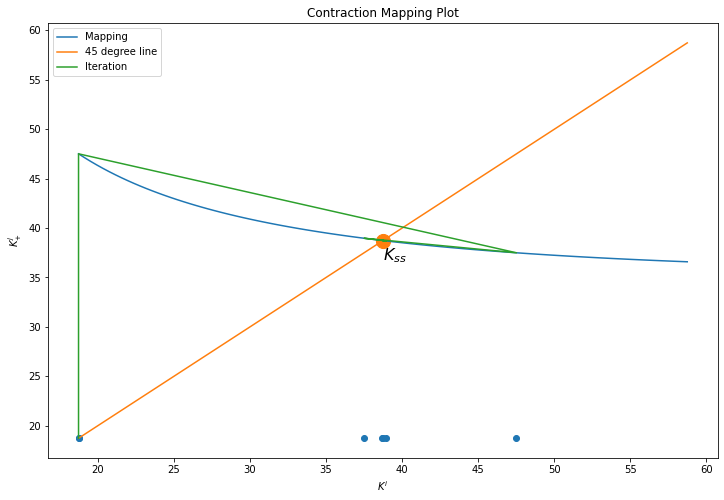

In [17]:
## illustrate the contraction mapping
K_start = K_ss-ss_jump # starting point / jump off the steady state
niter = 6 # number of iterations

x = [] # storage for x-values of iteration points
y = [] # storage for z-values of iteration points
x.append([K_start]) # x-values of starting point
y.append([K_start]) # y-values of starting point'

K_iter = np.copy(K_start) # initialise starting value

for iteration in range(niter):
    # a. Iterate K forward
    C_iter_plus,A_iter_plus,K_iter_plus = solve(K_iter,par)  # solve for next K
    x.append([K_iter]) # x-values new K
    y.append([K_iter_plus]) # y-values new K
    
    # b. Plot the iteration
    display.display(plt.gcf()) 
    display.clear_output(wait=True) # clear plot after every iteration (so that plot looks interactive)
    
    plt.plot(K,K_plus) # mapping function
    plt.plot(K,K) # 45 degree line
    plt.plot(x,y) # K points of iteration
    plt.scatter(x,np.repeat(y[0],len(x))) # plot convergences along the x-axis 
    plt.scatter(K_ss,K_ss,s=200) # Point of steady state
    plt.text(K_ss,K_ss-ss_jump/10, '$K_{ss}$', fontsize=16) # label of steady state point
    plt.title('Contraction Mapping Plot')
    plt.xlabel('$K^i$')
    plt.ylabel('$K^j_{+}$')
    plt.gca().legend(('Mapping','45 degree line','Iteration'))
    plt.show()
    
    time.sleep(2.5) # low down iterations 
    
    # c. Update K for next iteration
    K_iter = np.copy(K_iter_plus)

# Lecture 1: Exericse

# Introducing a pension scheme to the code 

* The equations below introduce a balanced-budget pay-as-you-go pension scheme to the model outlined in Lecture 1. Working agents contribute a constant share of their wage income $\tau$ to such a pension scheme, while retired agents receive a benefit $b_t$.

###  The balanced budget
\begin{align}
       \tau w_t \sum_{j=1}^{R} l_{j,t-j} & = \sum_{j=R+1}^{T} b_{t} \\
\end{align}

###  The household problem
With a pension system, the household problem reads:
\begin{align}
\max_{\left\{ c_{t}^{i},s_{t}^{i}\right\} }\text{ }U & =\sum_{j=1}^{T}\beta^{t}u(c_{j,t})\\
& s.t.\\
c_{j,t}+a_{j,t} & =\left( 1-\tau \right) w_{t+j}l_{j,t}+\left(1+r_{t+j}\right)a_{j-1,t} + \left(1-l_{j,t}\right)b_t \quad \quad \text{with }  a_{0,t}=0
\end{align}


### Consolidated budget constraint
Deriving the consolidated budget constraint at birth yields:
\begin{align}
\sum_{j=1}^{T}\dfrac{c_{j,t}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}= \sum_{j=1}^{T}\dfrac{\left( 1-\tau \right) w_{t+j}l_{j,t} +\left(1-l_{j,t}\right)b_{t+j}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}
\end{align}

### Solve for $c_1$
Solving for $c_{1,t}$ by eliminating $c_{j,t}$ using the long-term Euler-Equation:
\begin{align}
c_{1,t}=\dfrac{\sum_{j=1}^{T}\dfrac{\left( 1-\tau \right) w_{t+j}l_{j,t} +\left(1-l_{j,t}\right)b_{t+j}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}}{\sum_{j=1}^{T}\dfrac{\left[\dfrac{\beta^{j-1}}{\left(1+r_{t+j}\right)}\prod_{x=1}^{j}\left(1+r_{t+x}\right)\right]^{\frac{1}{\rho}}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}}
\end{align}

## Steady State
The closed-form solution for first-period consumption for given steady-state factor prices reads:
\begin{equation}
c_1=\dfrac{\sum_{j=1}^{T}\dfrac{\left( 1-\tau \right) w l_{j}  +   \left(1-l_{j}\right)b }{\left(1+r\right)^{j}}}{\sum_{j=1}^{T}\dfrac{\left[\beta\left(1+r\right)\right]^{\frac{j-1}{\rho}}}{\left(1+r\right)^{j}}}
\end{equation}

where:
\begin{align}
       b = & \tau w \dfrac{  \sum_{j=1}^{T}  l_{j} }{T-R}
\end{align}

steady-state saving can then be traced back via the period-by-period budget.


# Exercise

### 1) Add the pension scheme to the code offered in Lecture 1.


### 2) Solve for the steady-state given $\tau=0.1$ and compare the new steady state to the one without the pension scheme.

